## Imports

In [14]:
from jupyterthemes import jtplot
import pandas as pd
import matplotlib.pyplot as plt
jtplot.style('onedork')

In [6]:
PROJECT = 'Introduction to Data Visualization with Matplotlib'


## DataFrames

In [7]:
seattle_weather = pd.read_csv(f'data/{PROJECT}/seattle_weather.csv')
austin_weather = pd.read_csv(f'data/{PROJECT}/austin_weather.csv')
seattle_weather = seattle_weather[
    seattle_weather['NAME'] == 'SEATTLE SAND PT WSFO, WA US'
]

climate_change = pd.read_csv(f'data/{PROJECT}/climate_change.csv', 
                             parse_dates=['date'], index_col='date')

medals = pd.read_csv(f'data/{PROJECT}/medals_by_country_2016.csv', index_col=[0])

rio_olympics = pd.read_csv(f'data/{PROJECT}/summer2016.csv')

mens_rowing = rio_olympics[
    (rio_olympics['Sex'] == 'M') & (rio_olympics['Sport'] == 'Rowing')
]

mens_gymnastics = rio_olympics[
    (rio_olympics['Sex'] == 'M') & (rio_olympics['Sport'] == 'Gymnastics')
]

## Functions

In [8]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

## Plotting

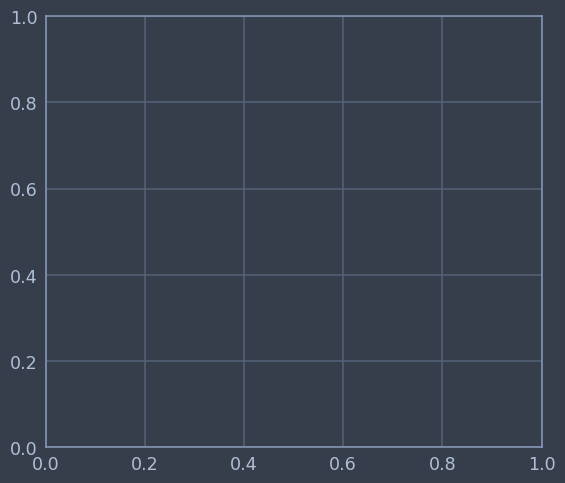

In [15]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

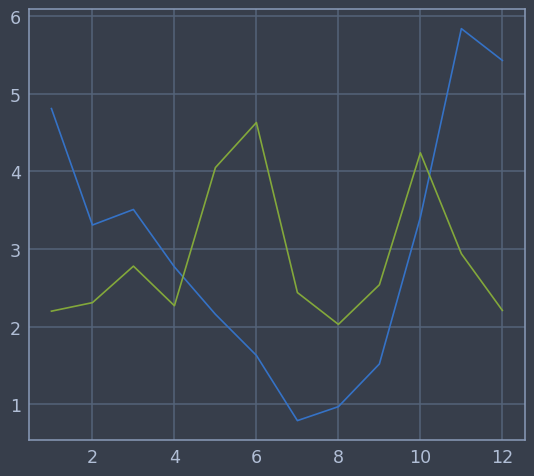

In [16]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["DATE"], seattle_weather['MLY-PRCP-NORMAL'])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["DATE"], austin_weather['MLY-PRCP-NORMAL'])

# Call the show function
plt.show()

### Customizing

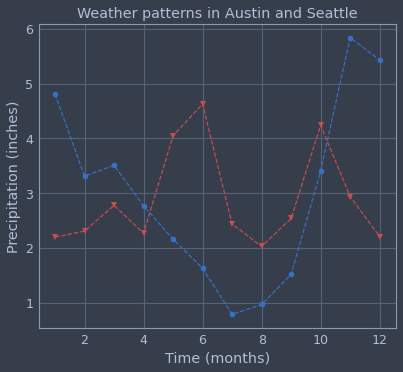

In [62]:
fig, ax = plt.subplots()
# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["DATE"], seattle_weather["MLY-PRCP-NORMAL"], color='b', linestyle='--', marker='o')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["DATE"], austin_weather["MLY-PRCP-NORMAL"], color='r', linestyle='--', marker='v')

# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")
# Call show to display the resulting plot
plt.show()

### Creating a grid of subplots

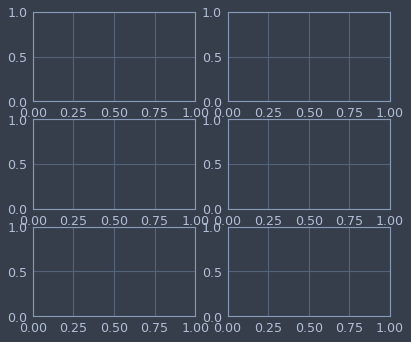

In [63]:
fig, ax = plt.subplots(3, 2)

plt.show()

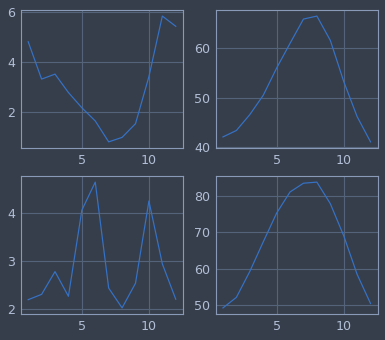

In [64]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
seattle_weather.columns
ax[0, 0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['DATE'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather['DATE'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

### Shared axis

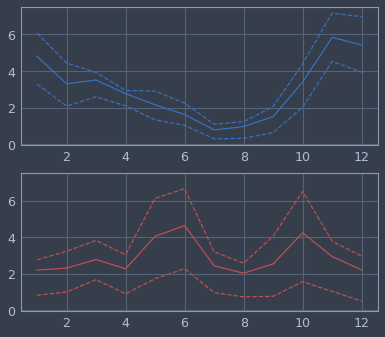

In [65]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-NORMAL'], color = 'b')
ax[0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-25PCTL'], color = 'b', linestyle='--')
ax[0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-75PCTL'], color = 'b', linestyle='--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-NORMAL'], color = 'r')
ax[1].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-25PCTL'], color = 'r', linestyle='--')
ax[1].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-75PCTL'], color = 'r', linestyle='--')

plt.show()

### Time series data

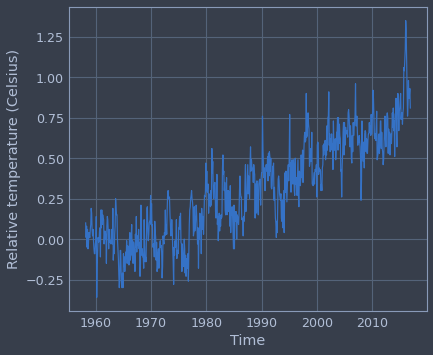

In [66]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

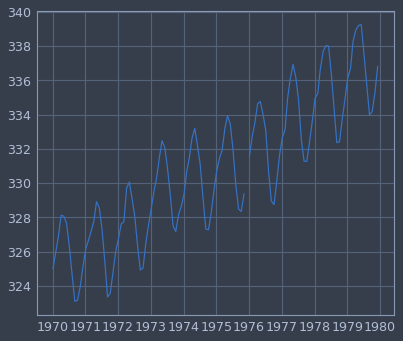

In [67]:
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

### Plotting time-series with different variables

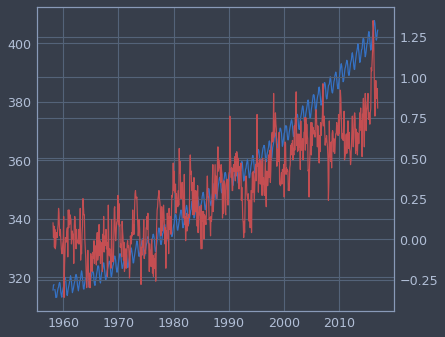

In [68]:
# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')

plt.show()

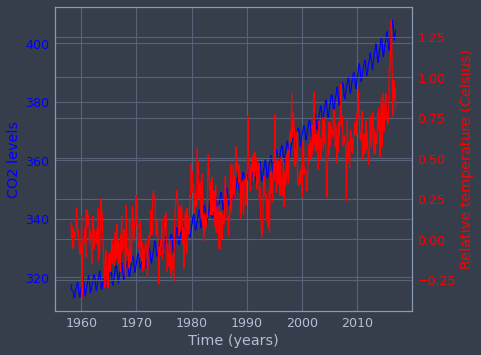

In [69]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", "Time (years)", "Relative temperature (Celsius)")

plt.show()

### Annotating time series data

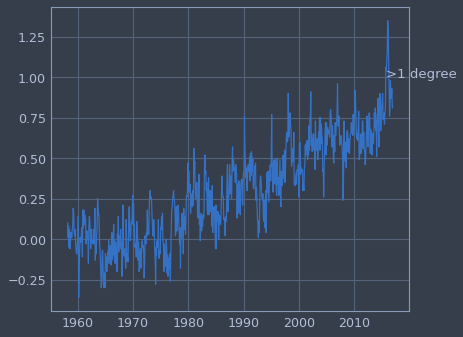

In [70]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', (pd.Timestamp('2015-10-06'), 1))

plt.show()

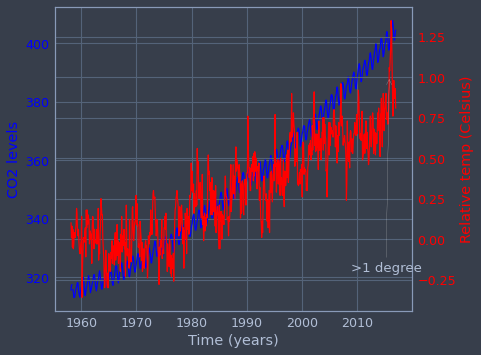

In [71]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", 
xy=(pd.Timestamp('2015-10-06'), 1),
xytext=(pd.Timestamp('2008-10-06'),
-0.2),
arrowprops={"arrowstyle":"->","color":"white"})

plt.show()

### Bar charts

<ipython-input-72-44c1f87e0a28>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


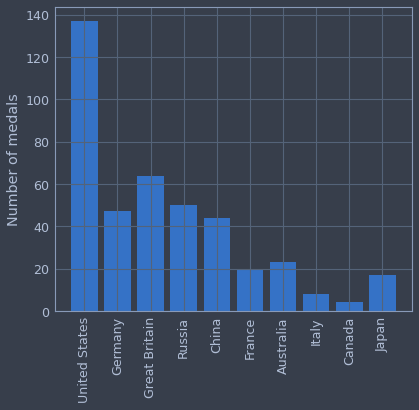

In [72]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

<ipython-input-73-5674e76e0b80>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


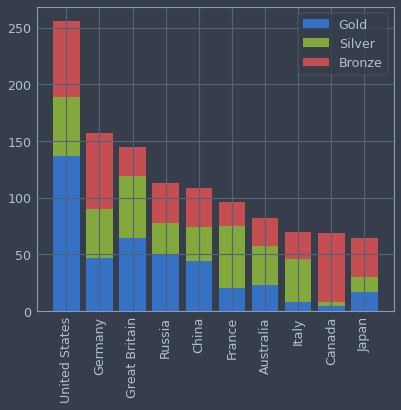

In [73]:
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label="Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold'] + medals['Silver'], label="Bronze")

# Display the legend

ax.set_xticklabels(medals.index, rotation=90)

ax.legend()

plt.show()

### Histograms

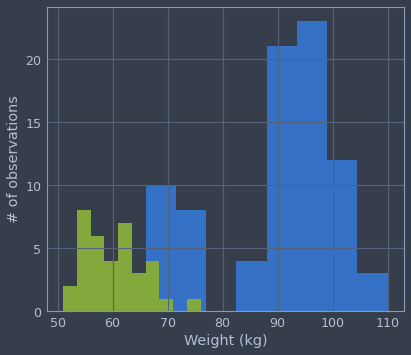

In [74]:
fig, ax = plt.subplots()
mens_rowing
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

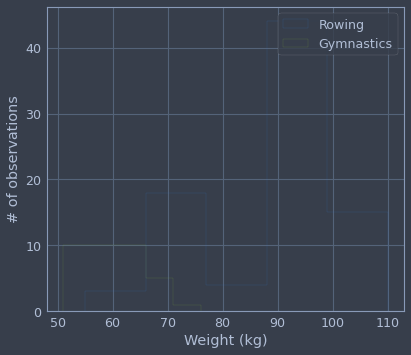

In [75]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], histtype='step', bins=5, label="Rowing")

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"], histtype='step', bins=5, label='Gymnastics')

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

### Error bars

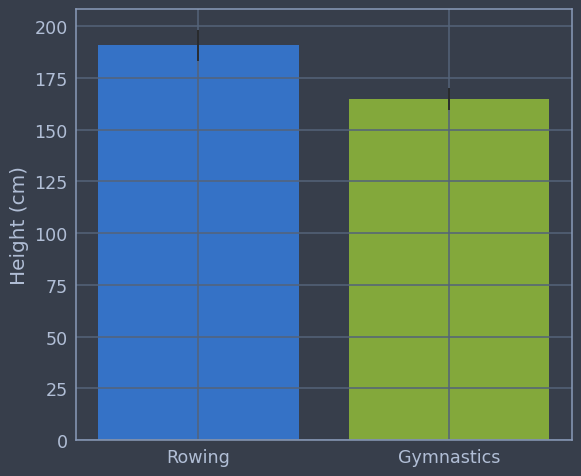

In [17]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

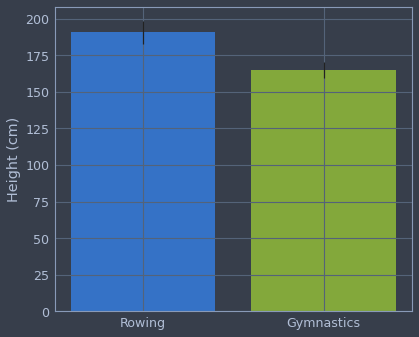

In [77]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

### Boxplot

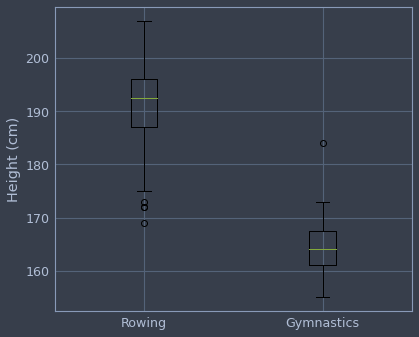

In [78]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

### Scatterplot

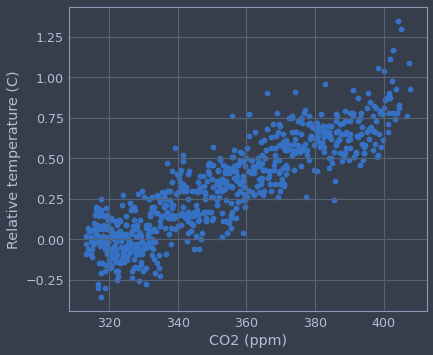

In [79]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'], climate_change['relative_temp'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

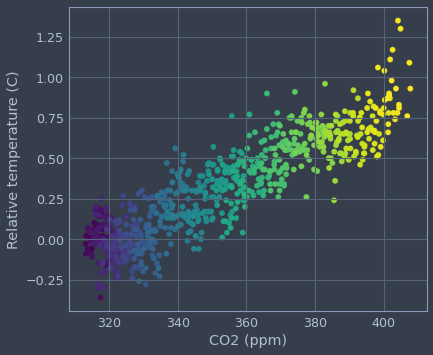

In [80]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

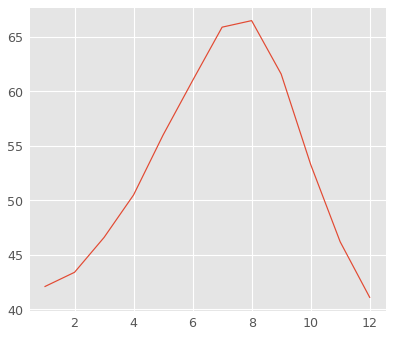

In [82]:
fig, ax = plt.subplots()
plt.style.use('ggplot')
ax.plot(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()